# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [2]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [3]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [4]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [5]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [6]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')

# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [7]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,한식 일반 음식점업,커피전문점,기타주점업,일반 교과 학원
0,종로구,5912,3613,1413,382
1,중구,6414,3542,982,175
2,용산구,2987,2076,1332,573
3,성동구,2785,1859,621,1494
4,광진구,2861,1887,1577,1646


In [8]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [9]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [10]:
# 확인
df.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,한식 일반 음식점업,커피전문점,기타주점업,일반 교과 학원,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,11486,7273,2528,9020,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,3388,1660,1349,2104,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2663,1095,1275,740,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,4584,2530,1709,2347,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,3689,2049,1672,1230,248571,248566,497137


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 인구 수가 많을 수록 노선수가 많을 것이다

### 2) 가설 2: 상권이 발달되어 있을수록 노선수가 많을 것이다

### 3) 가설 3: 평균 이동시간이 길수록 노선수가 적을 것이다

### 4) 가설 4: 승/하차 인구가 많을 수록 노선수가 많을 것이다

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

### 1)

In [11]:
# 통계량
print(df[['합계', '노선수']].describe())

# 정리 : 각 자치구 별 남녀의 수는 크게 차이가 없다. 송파구에 가장 인구가 많고, 중구에 가장 인구가 적다.

                  합계         노선수
count      25.000000   25.000000
mean   384530.680000   75.840000
std    126587.549792   23.487018
min    131757.000000   24.000000
25%    307784.000000   57.000000
50%    389003.000000   75.000000
75%    467902.000000  100.000000
max    658360.000000  109.000000


### 2)

In [12]:
# 통계량
df['상권'] = df['한식 일반 음식점업'] + df['커피전문점'] + df['기타주점업'] + df['일반 교과 학원']
print(df[['상권', '노선수']].describe(), end='\n\n')
print(df[['한식 일반 음식점업', '노선수']].describe(), end='\n\n')
print(df[['커피전문점', '노선수']].describe(), end='\n\n')
print(df[['기타주점업', '노선수']].describe(), end='\n\n')
print(df[['일반 교과 학원', '노선수']].describe())

# 정리 : 대부분의 자치구는 한식 일반 음식점업, 커피전문점, 기타주점업, 일반 교과 학원 순으로 업종이 분포한다. 최대/최소 비율과 표준 편차를 고려했을때, 일반 교과 학원이 자치구 별 격차가 가장 큰 것으로 보인다. 특히 양천구의 경우, 일반 교과 학원 업종이 다른 자치구보다 훨씬 우세한 것을 볼 수 있다. 따라서 한식 일반 음식점업이 상권을 대표한다고 할 수 있다.

                상권         노선수
count     25.00000   25.000000
mean    9585.96000   75.840000
std     5300.43813   23.487018
min     4485.00000   24.000000
25%     6599.00000   57.000000
50%     7971.00000   75.000000
75%    11170.00000  100.000000
max    30307.00000  109.000000

        한식 일반 음식점업         노선수
count     25.00000   25.000000
mean    4007.32000   75.840000
std     2132.72849   23.487018
min     2009.00000   24.000000
25%     2663.00000   57.000000
50%     2987.00000   75.000000
75%     4705.00000  100.000000
max    11486.00000  109.000000

             커피전문점         노선수
count    25.000000   25.000000
mean   2292.880000   75.840000
std    1452.869383   23.487018
min     837.000000   24.000000
25%    1375.000000   57.000000
50%    1748.000000   75.000000
75%    3295.000000  100.000000
max    7273.000000  109.000000

             기타주점업         노선수
count    25.000000   25.000000
mean   1254.840000   75.840000
std     502.206936   23.487018
min     477.000000   24.000000
25%  

### 3)

In [13]:
# 통계량
print(df[['평균 이동 시간(분)', '노선수']].describe())

# 정리 : 대부분의 자치구가 평균값에 분포하고 있다.

       평균 이동 시간(분)         노선수
count    25.000000   25.000000
mean     62.947805   75.840000
std       4.293887   23.487018
min      56.495425   24.000000
25%      59.917230   57.000000
50%      62.806200   75.000000
75%      65.848807  100.000000
max      71.135695  109.000000


### 4)

In [14]:
# 통계량
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']
print(df[['승하차총승객수', '노선수']].describe())

# 정리 : 승차 총 승객 수와 하차 총 승객 수의 차이는 유의미하지 않다.

            승하차총승객수         노선수
count  2.500000e+01   25.000000
mean   1.074016e+07   75.840000
std    2.988618e+06   23.487018
min    6.319907e+06   24.000000
25%    8.623374e+06   57.000000
50%    1.077542e+07   75.000000
75%    1.234917e+07  100.000000
max    1.775337e+07  109.000000


### 5)

In [15]:
# 통계량
print(df['노선수'].describe())
      
# 정리 : 노선수는 평균 보다 적은 자치구가 10개이고 많은 자치구가 11개로, 평균값을 가지는 값이 매우 적다. 즉, 노선수 값들이 양 극단에 분포한다.

count     25.000000
mean      75.840000
std       23.487018
min       24.000000
25%       57.000000
50%       75.000000
75%      100.000000
max      109.000000
Name: 노선수, dtype: float64


# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1

인구수-노선수
상관계수 : -0.20995834421299847
p-value : 0.3137753322677257


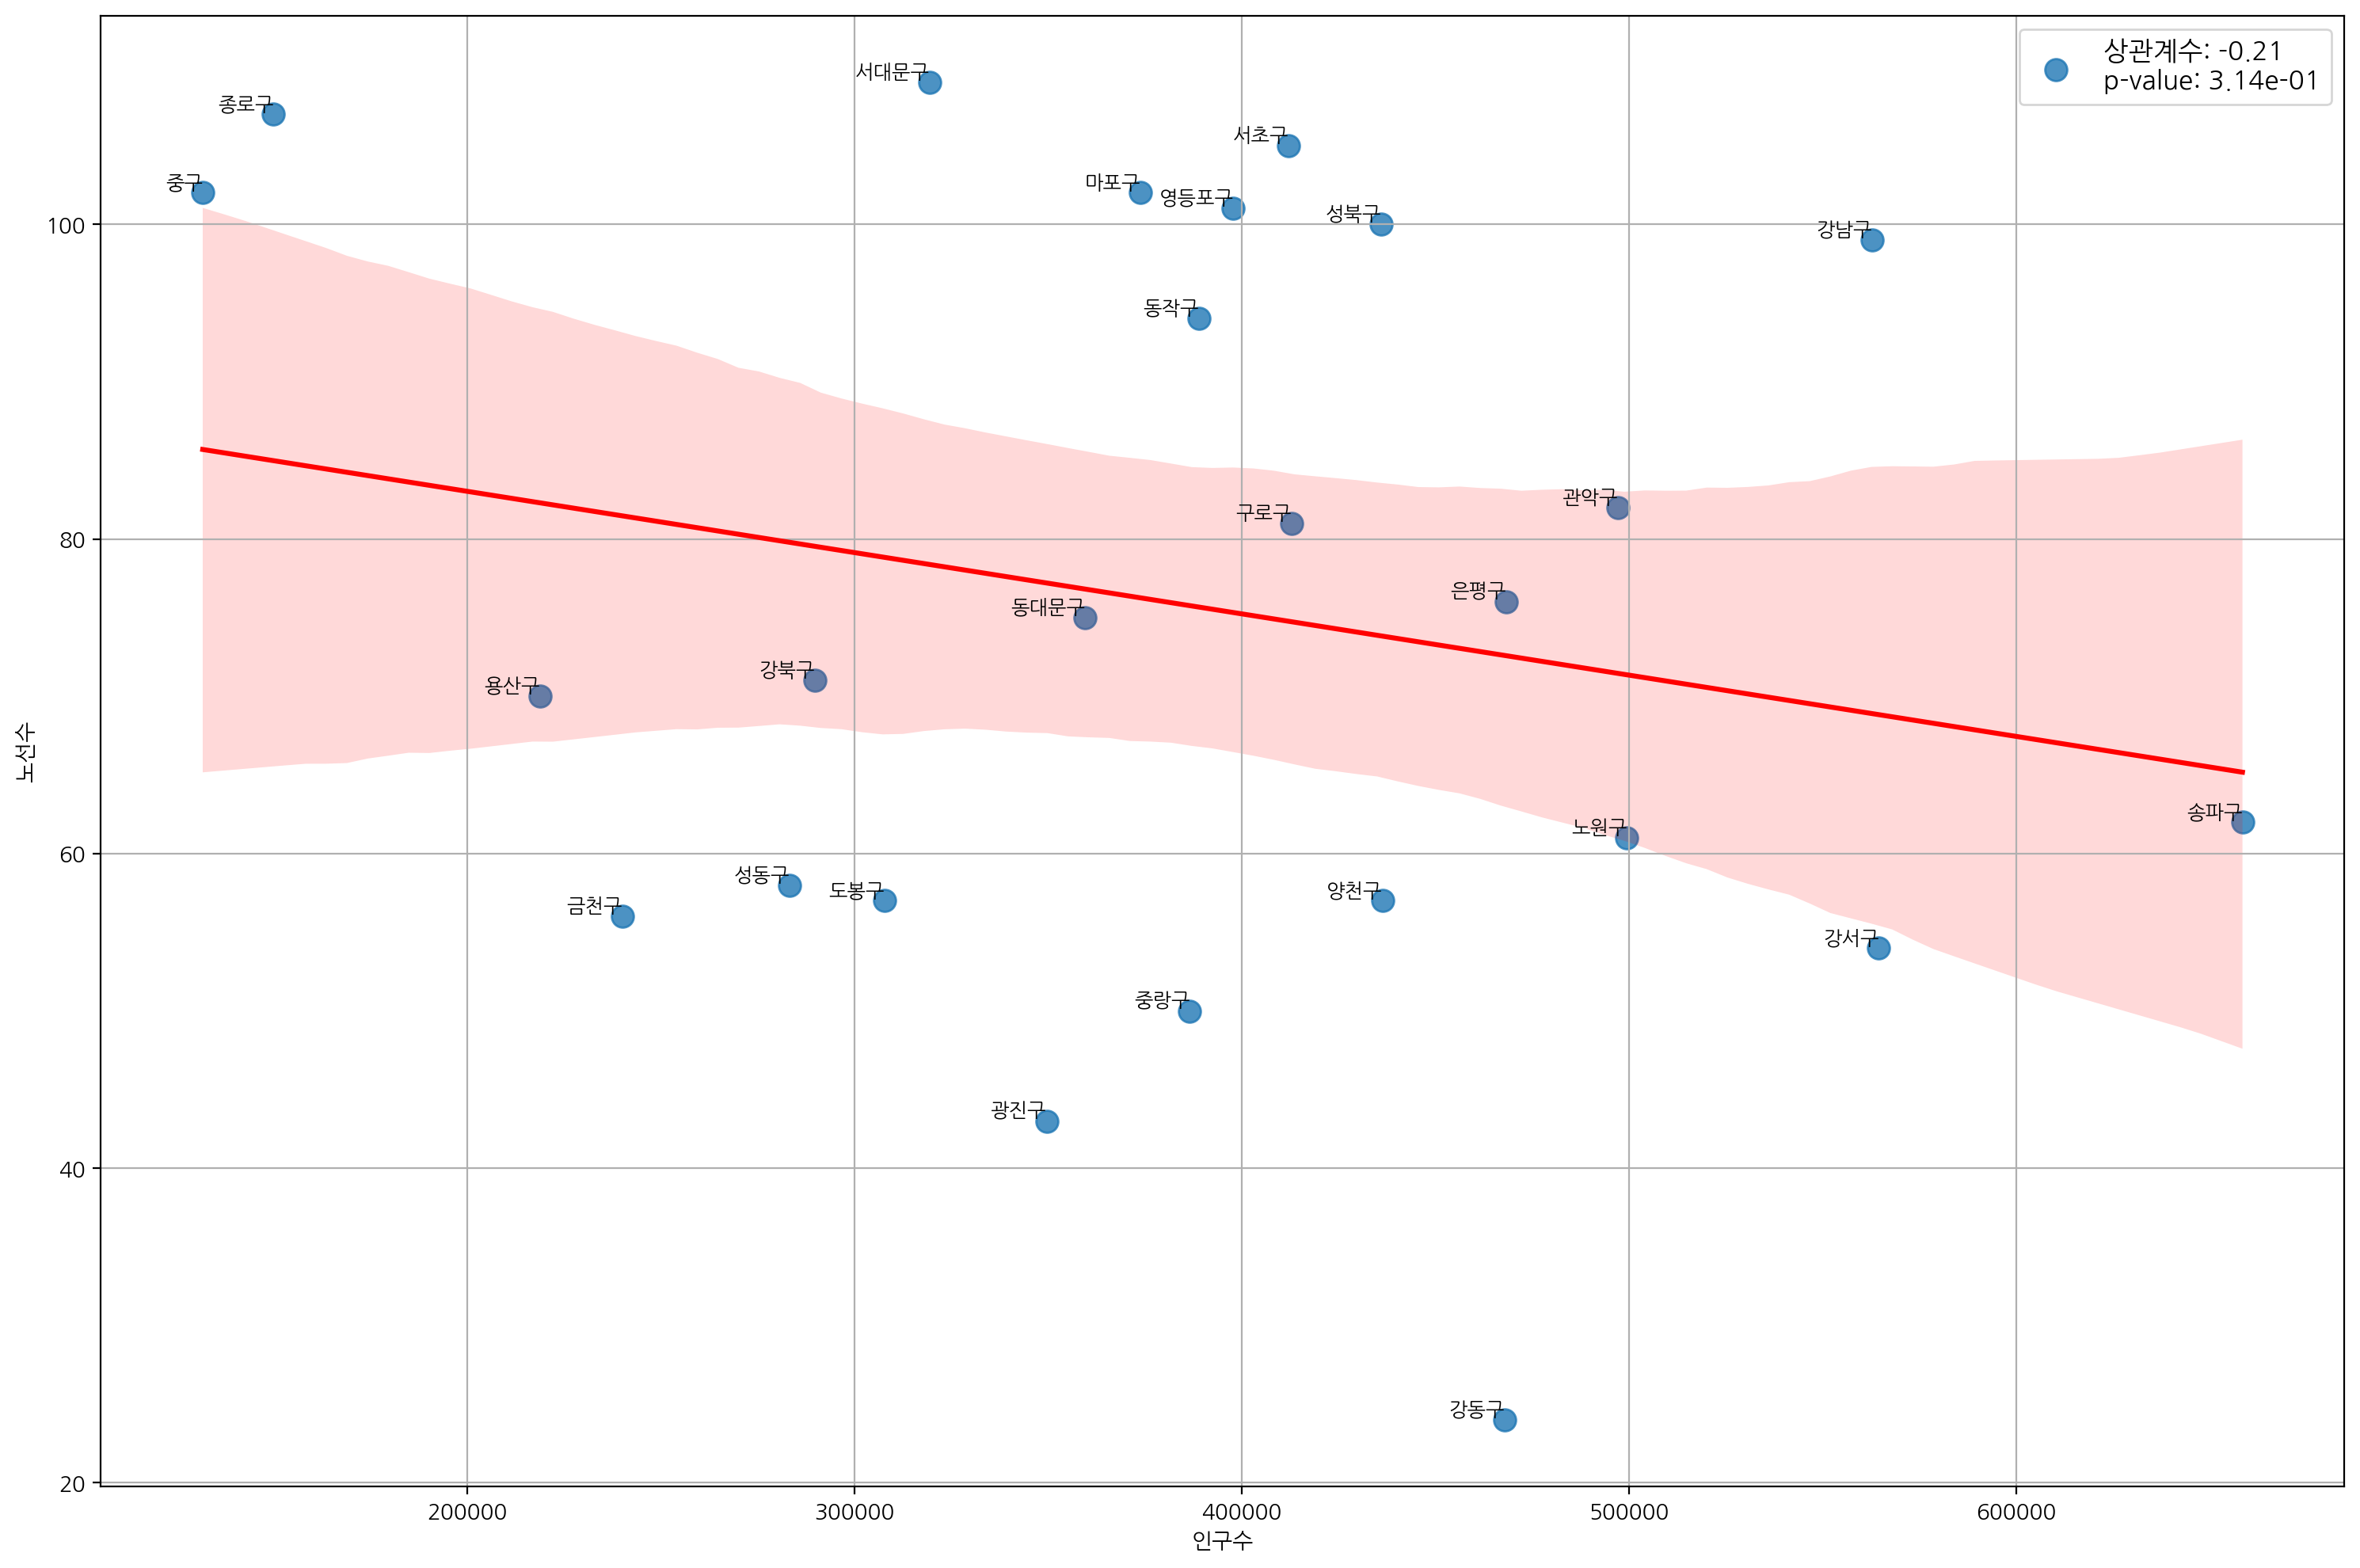

In [16]:
plt.figure(figsize=(15, 10))

# 산점도와 선형 회귀선
sns.regplot(x='합계', y='노선수', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.xlabel('인구수')
plt.ylabel('노선수')
plt.grid()

# 상관계수 및 p-value 계산
correlation, p_value = spst.pearsonr(df['합계'], df['노선수'])

# 상관계수와 p-value를 레전드로 추가
label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
plt.legend([label_text], loc='upper right', fontsize=12)

for i in range(len(df)):
    plt.text(df['합계'].iloc[i], df['노선수'].iloc[i],
             df['자치구'].iloc[i],
             fontsize=9, ha='right', va='bottom')

result = spst.pearsonr(df['합계'],df['노선수'])
print('인구수'+'-'+'노선수')
print(f'상관계수 : {result[0]}')
print(f'p-value : {result[1]}')

plt.tight_layout()
plt.show()

### 2) 가설 2

한식 일반 음식점업 - 노선수
상관계수: 0.47
p-value: 1.87e-02


커피전문점 - 노선수
상관계수: 0.48
p-value: 1.50e-02


기타주점업 - 노선수
상관계수: 0.29
p-value: 1.55e-01


일반 교과 학원 - 노선수
상관계수: 0.01
p-value: 9.52e-01




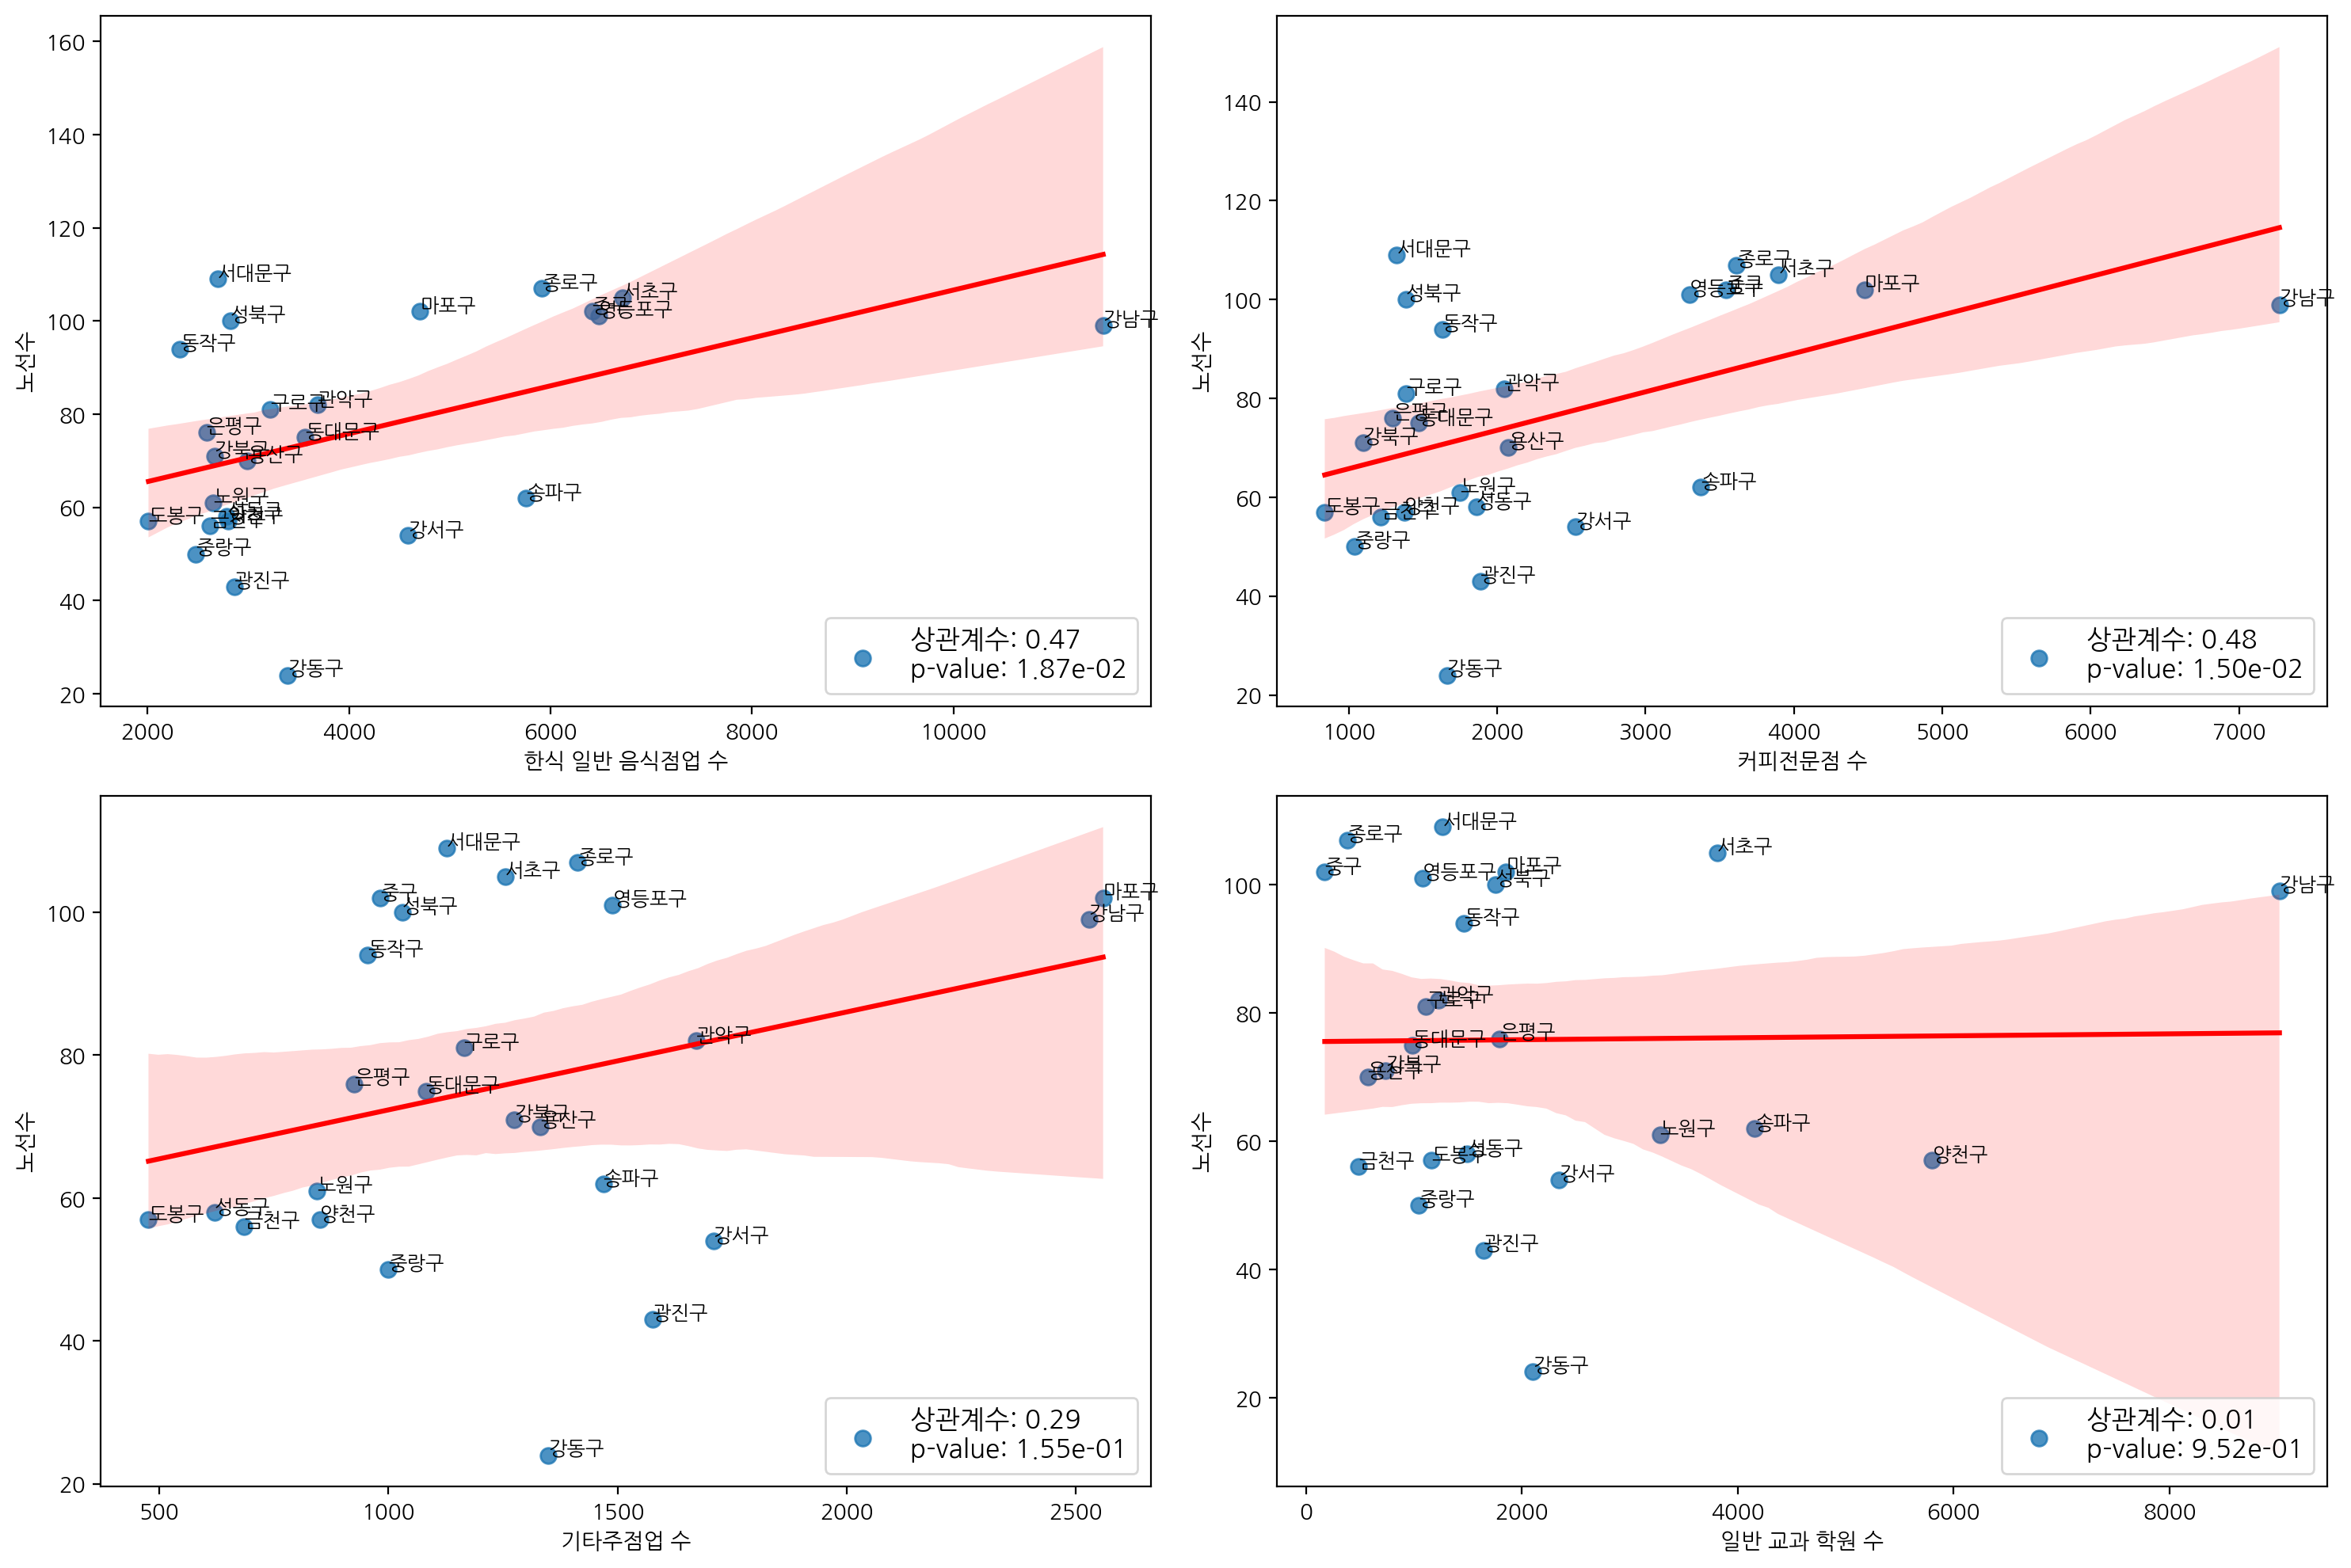

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 자치구 식별을 위한 자치구 이름 데이터 추가
districts = df['자치구']

# 업종 열 리스트 정의
industry_columns = ['한식 일반 음식점업', '커피전문점', '기타주점업', '일반 교과 학원']

# 노선수 데이터 (예시로 df['노선수']를 사용)
route_count = df['노선수']

# 각 업종별 노선수 상관관계 및 그래프 그리기 (자치구 식별 추가)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, industry in enumerate(industry_columns):
    # 상관계수 및 p-value 계산
    correlation, p_value = stats.pearsonr(df[industry], route_count)
    
    # 산점도 및 회귀선 그리기
    sns.regplot(x=df[industry], y=route_count, ax=axes[i//2, i%2], scatter_kws={'s': 50}, line_kws={'color':'red'})
    
    # 각 점에 자치구 이름 표시
    for j in range(len(df)):
        axes[i//2, i%2].text(df[industry].iloc[j], route_count.iloc[j], districts.iloc[j], fontsize=9)

    # 상관계수와 p-value를 레전드로 추가
    label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
    axes[i//2, i%2].legend([label_text], loc='lower right', fontsize=12)
    
    axes[i//2, i%2].set_xlabel(f'{industry} 수')
    axes[i//2, i%2].set_ylabel('노선수')

    # 콘솔에 상관계수 및 p-value 출력
    print(f'{industry} - 노선수')
    print(f'상관계수: {correlation:.2f}')
    print(f'p-value: {p_value:.2e}')
    print('\n')

plt.tight_layout()
plt.show()

### 3) 가설 3

평균 이동 시간(분)-노선수
상관계수 : -0.5164817726116779
p-value : 0.008210977030339494


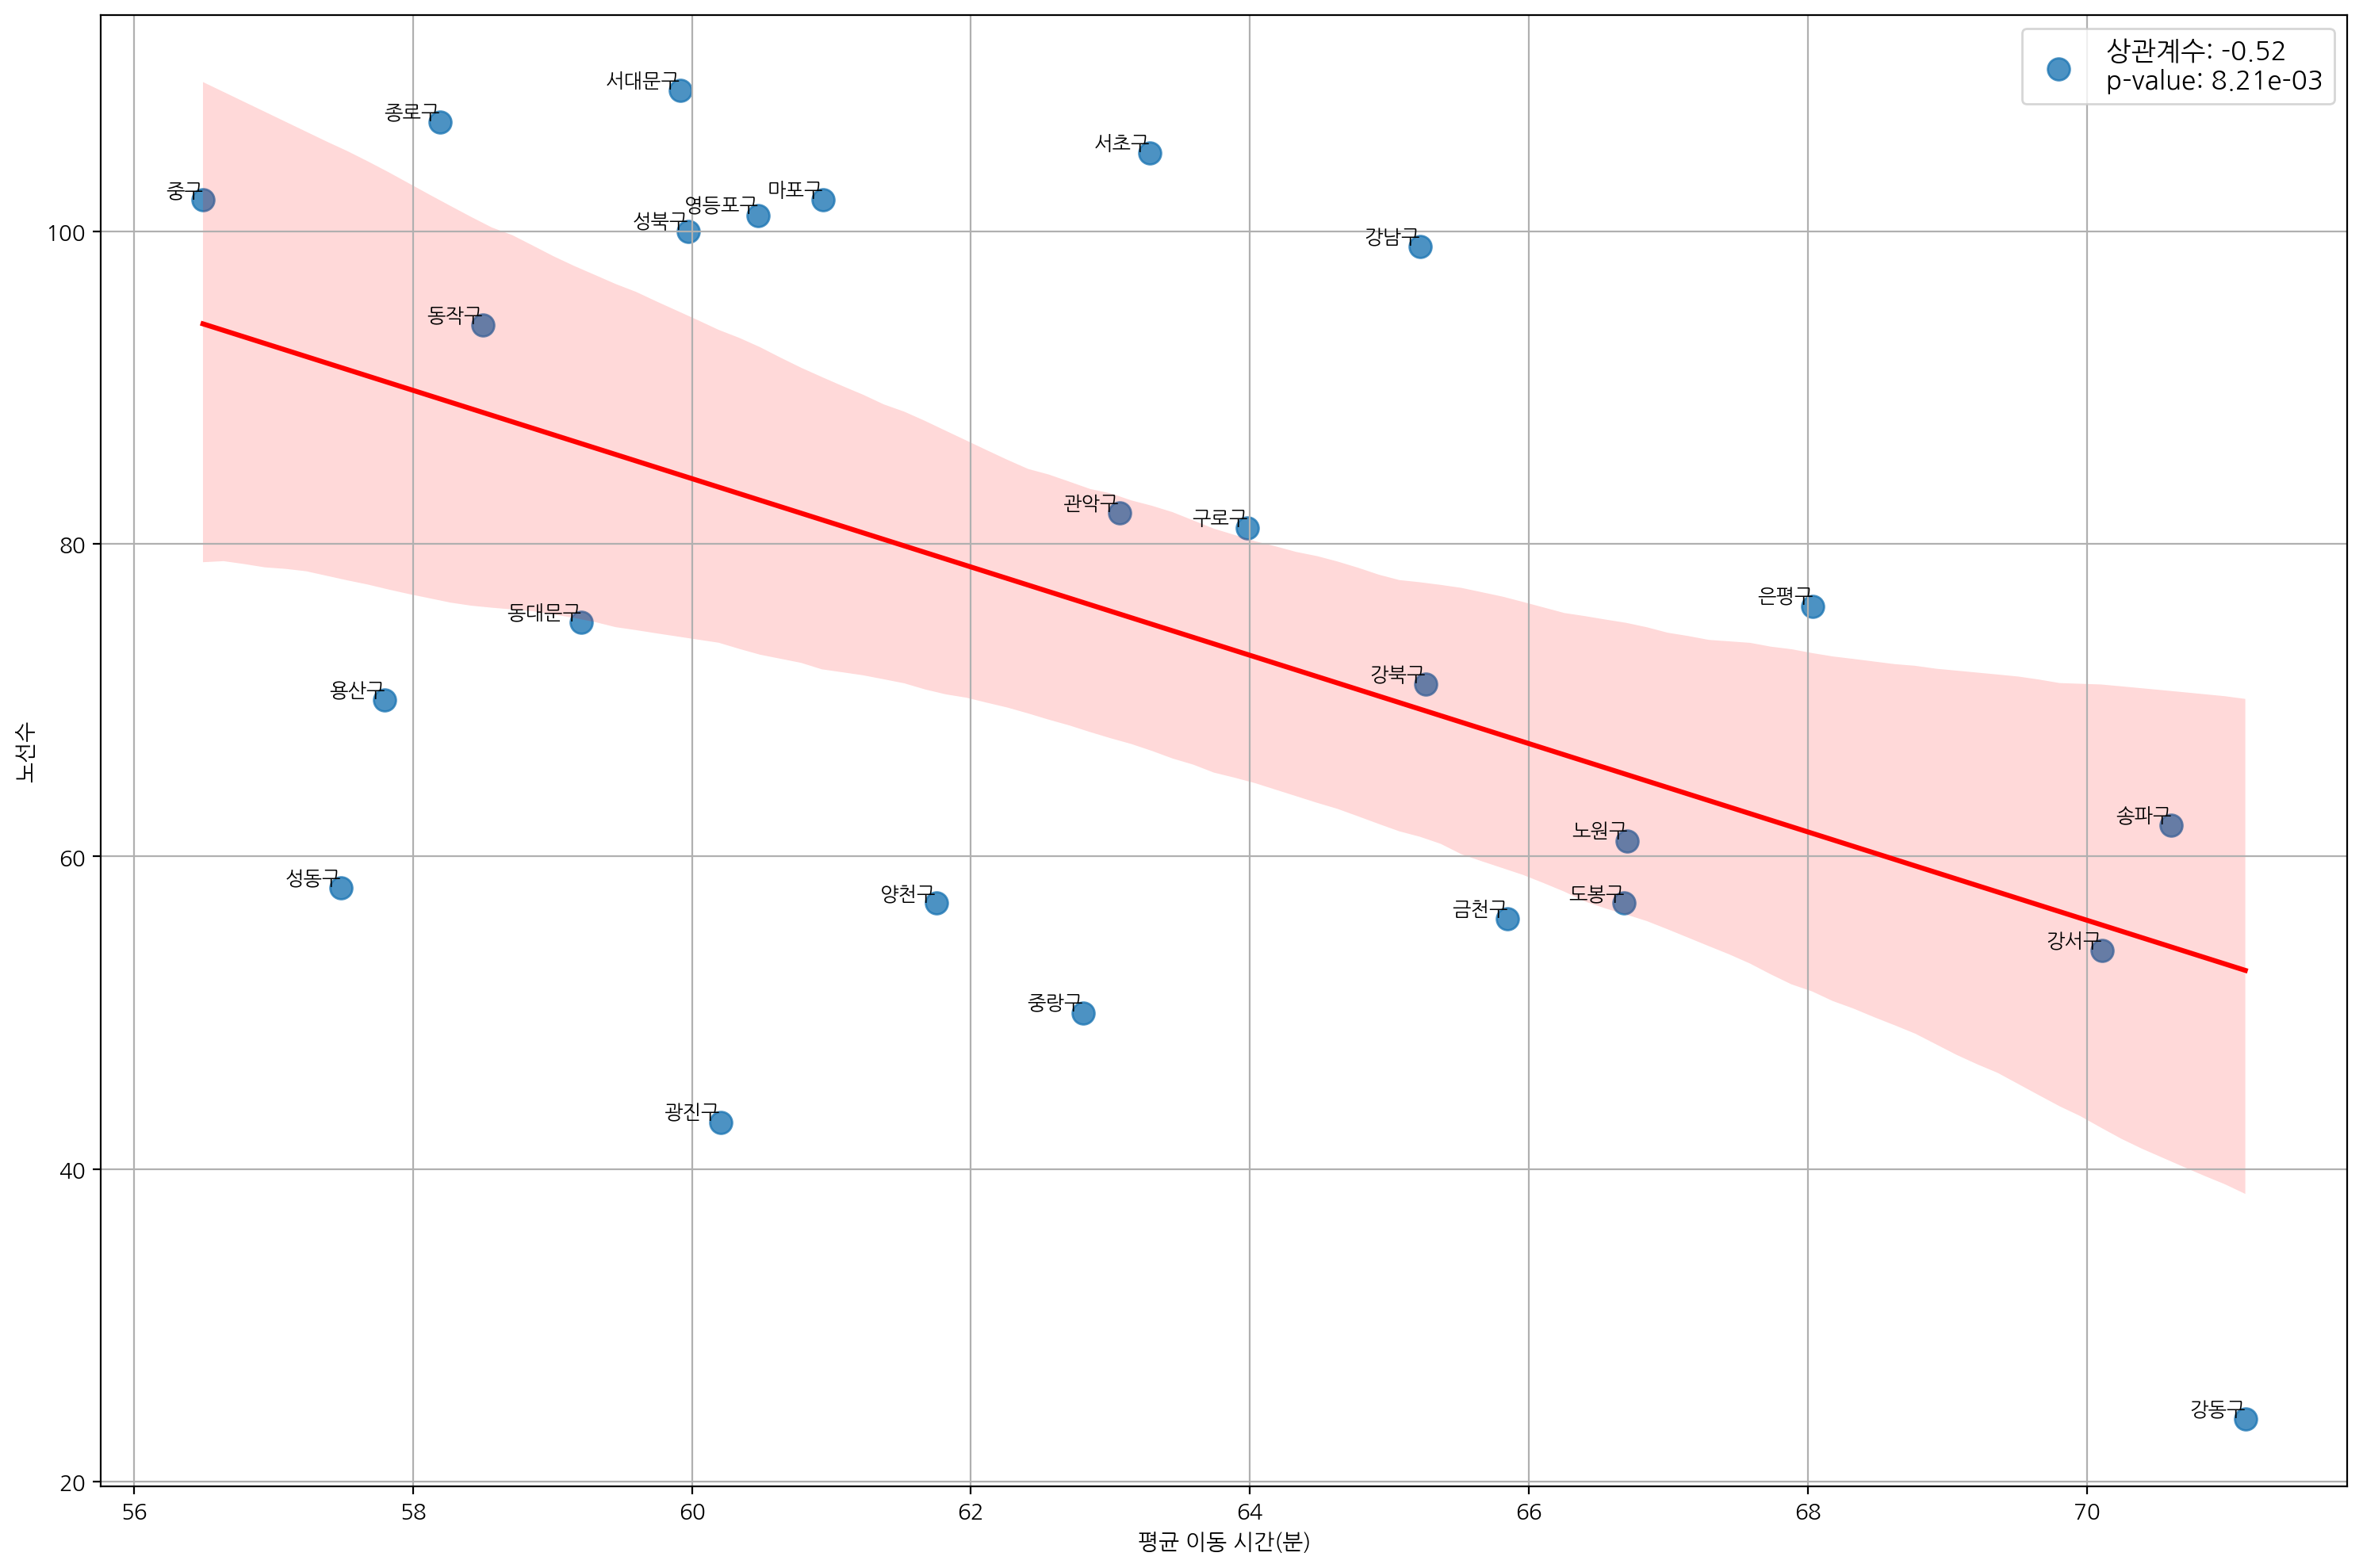

In [20]:
plt.figure(figsize=(15, 10))

# 산점도와 선형 회귀선
sns.regplot(x='평균 이동 시간(분)', y='노선수', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.xlabel('평균 이동 시간(분)')
plt.ylabel('노선수')
plt.grid()

# 상관계수 및 p-value 계산
correlation, p_value = spst.pearsonr(df['평균 이동 시간(분)'], df['노선수'])

# 상관계수와 p-value를 레전드로 추가
label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
plt.legend([label_text], loc='upper right', fontsize=12)

for i in range(len(df)):
    plt.text(df['평균 이동 시간(분)'].iloc[i], df['노선수'].iloc[i],
             df['자치구'].iloc[i],
             fontsize=9, ha='right', va='bottom')

result = spst.pearsonr(df['평균 이동 시간(분)'],df['노선수'])
print('평균 이동 시간(분)'+'-'+'노선수')
print(f'상관계수 : {result[0]}')
print(f'p-value : {result[1]}')

plt.tight_layout()
plt.show()

### 4) 가설 4

승차총승객수-노선수
상관계수 : 0.7307052559619787
p-value : 3.3550229844971895e-05


하차총승객수-노선수
상관계수 : 0.7187990183840054
p-value : 5.169948894248796e-05


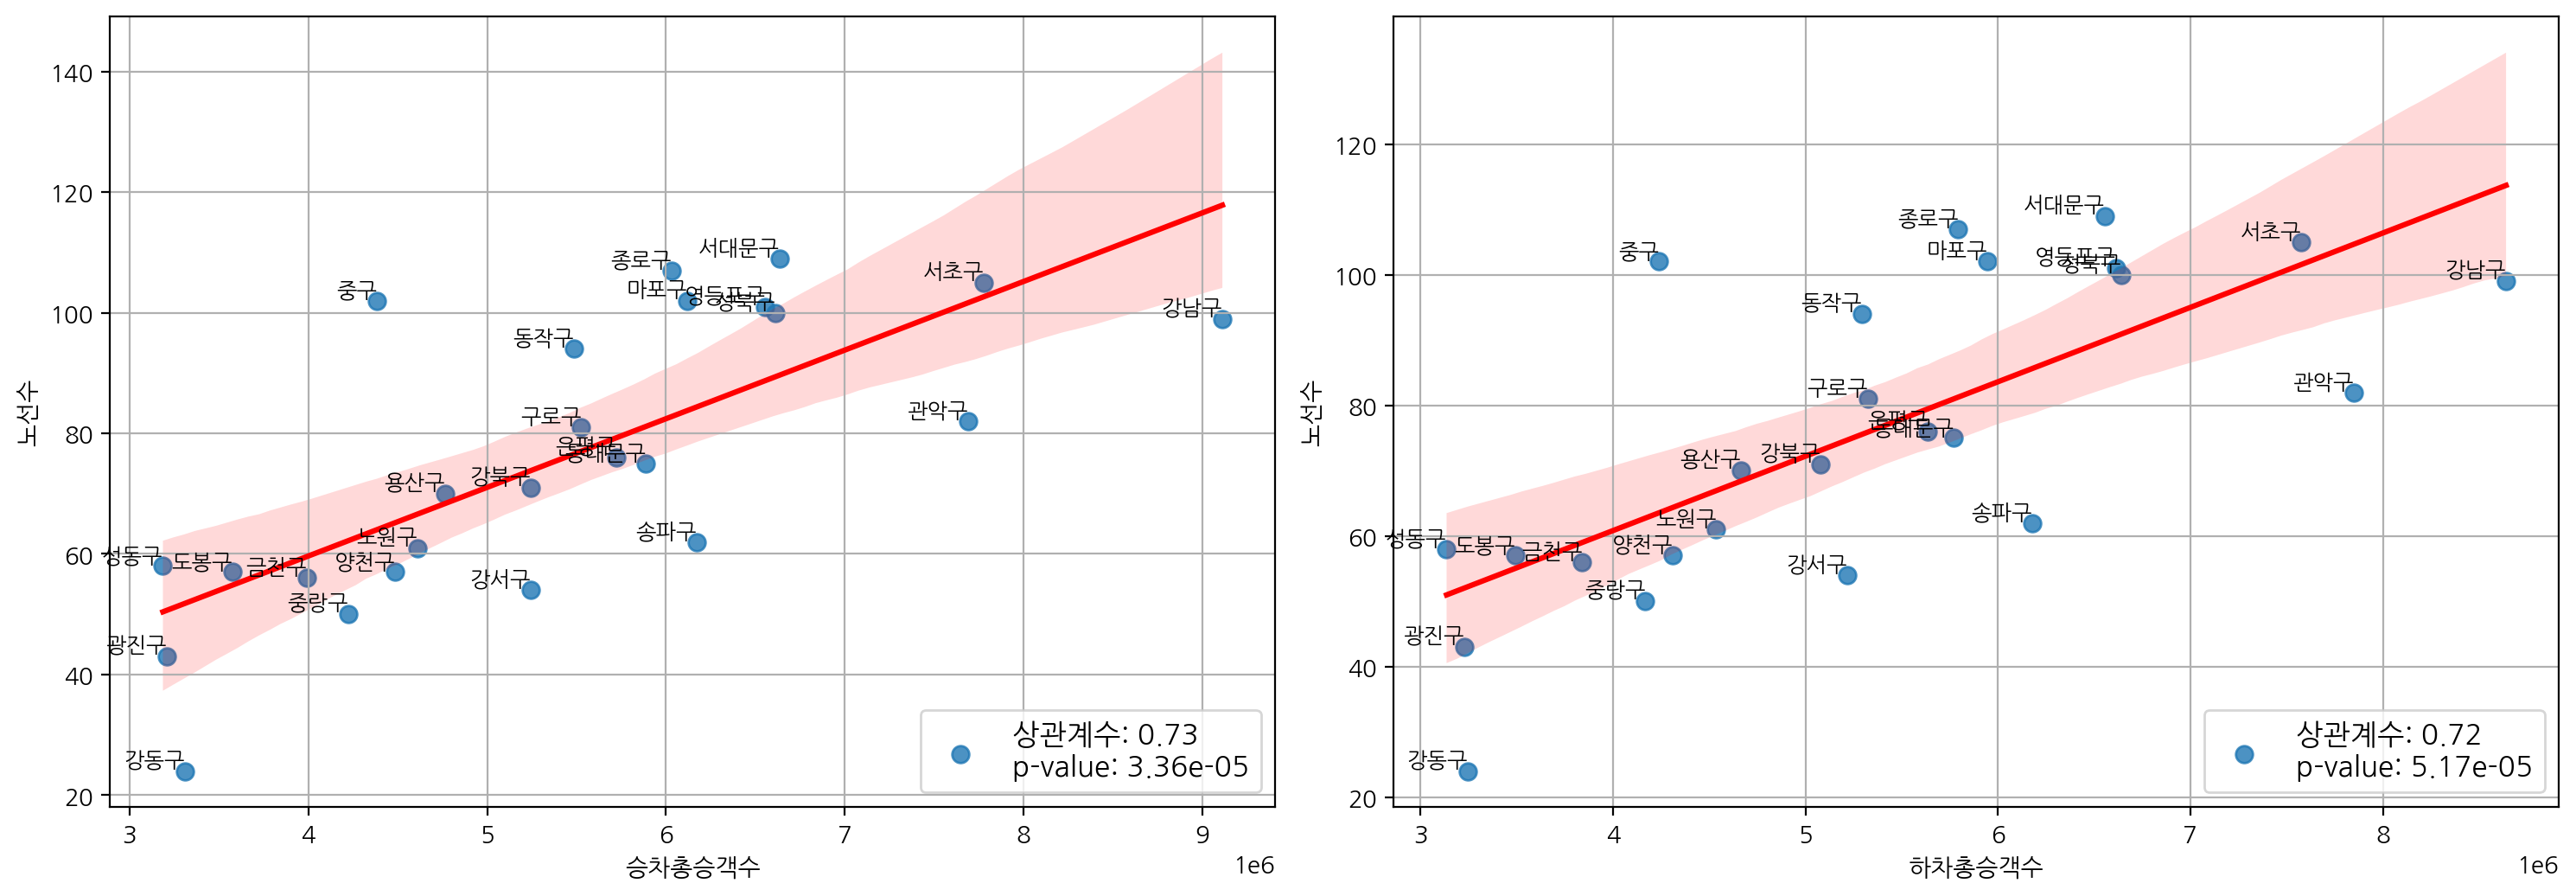

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# 첫 번째 산점도와 선형 회귀선
plt.subplot(2, 2, 1)
sns.regplot(x='승차총승객수', y='노선수', data=df_seoul_bus_station, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('승차총승객수')
plt.ylabel('노선수')
plt.grid()

# 상관계수 및 p-value 계산
correlation, p_value = spst.pearsonr(df['승차총승객수'], df['노선수'])

# 상관계수와 p-value를 레전드로 추가
label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
plt.legend([label_text], loc='lower right', fontsize=12)


for i in range(len(df_seoul_bus_station)):
    plt.text(df_seoul_bus_station['승차총승객수'].iloc[i], df_seoul_bus_station['노선수'].iloc[i],
             df_seoul_bus_station['자치구'].iloc[i],
             fontsize=9, ha='right', va='bottom')

result = spst.pearsonr(df['승차총승객수'],df['노선수'])
print('승차총승객수'+'-'+'노선수')
print(f'상관계수 : {result[0]}')
print(f'p-value : {result[1]}')
print('\n')


# 두 번째 산점도와 선형 회귀선
plt.subplot(2, 2, 2)
sns.regplot(x='하차총승객수', y='노선수', data=df_seoul_bus_station, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.xlabel('하차총승객수')
plt.ylabel('노선수')
plt.grid()

# 상관계수 및 p-value 계산
correlation, p_value = spst.pearsonr(df['하차총승객수'], df['노선수'])

# 상관계수와 p-value를 레전드로 추가
label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
plt.legend([label_text], loc='lower right', fontsize=12)

# 데이터 라벨 표시
for i in range(len(df_seoul_bus_station)):
    plt.text(df_seoul_bus_station['하차총승객수'].iloc[i], df_seoul_bus_station['노선수'].iloc[i],
             df_seoul_bus_station['자치구'].iloc[i],
             fontsize=9, ha='right', va='bottom')

result = spst.pearsonr(df['하차총승객수'],df['노선수'])
print('하차총승객수'+'-'+'노선수')
print(f'상관계수 : {result[0]}')
print(f'p-value : {result[1]}')

plt.tight_layout()
plt.show()

승하차총승객수-노선수
상관계수 : 0.7253742881923433
p-value : 4.0827710664552766e-05


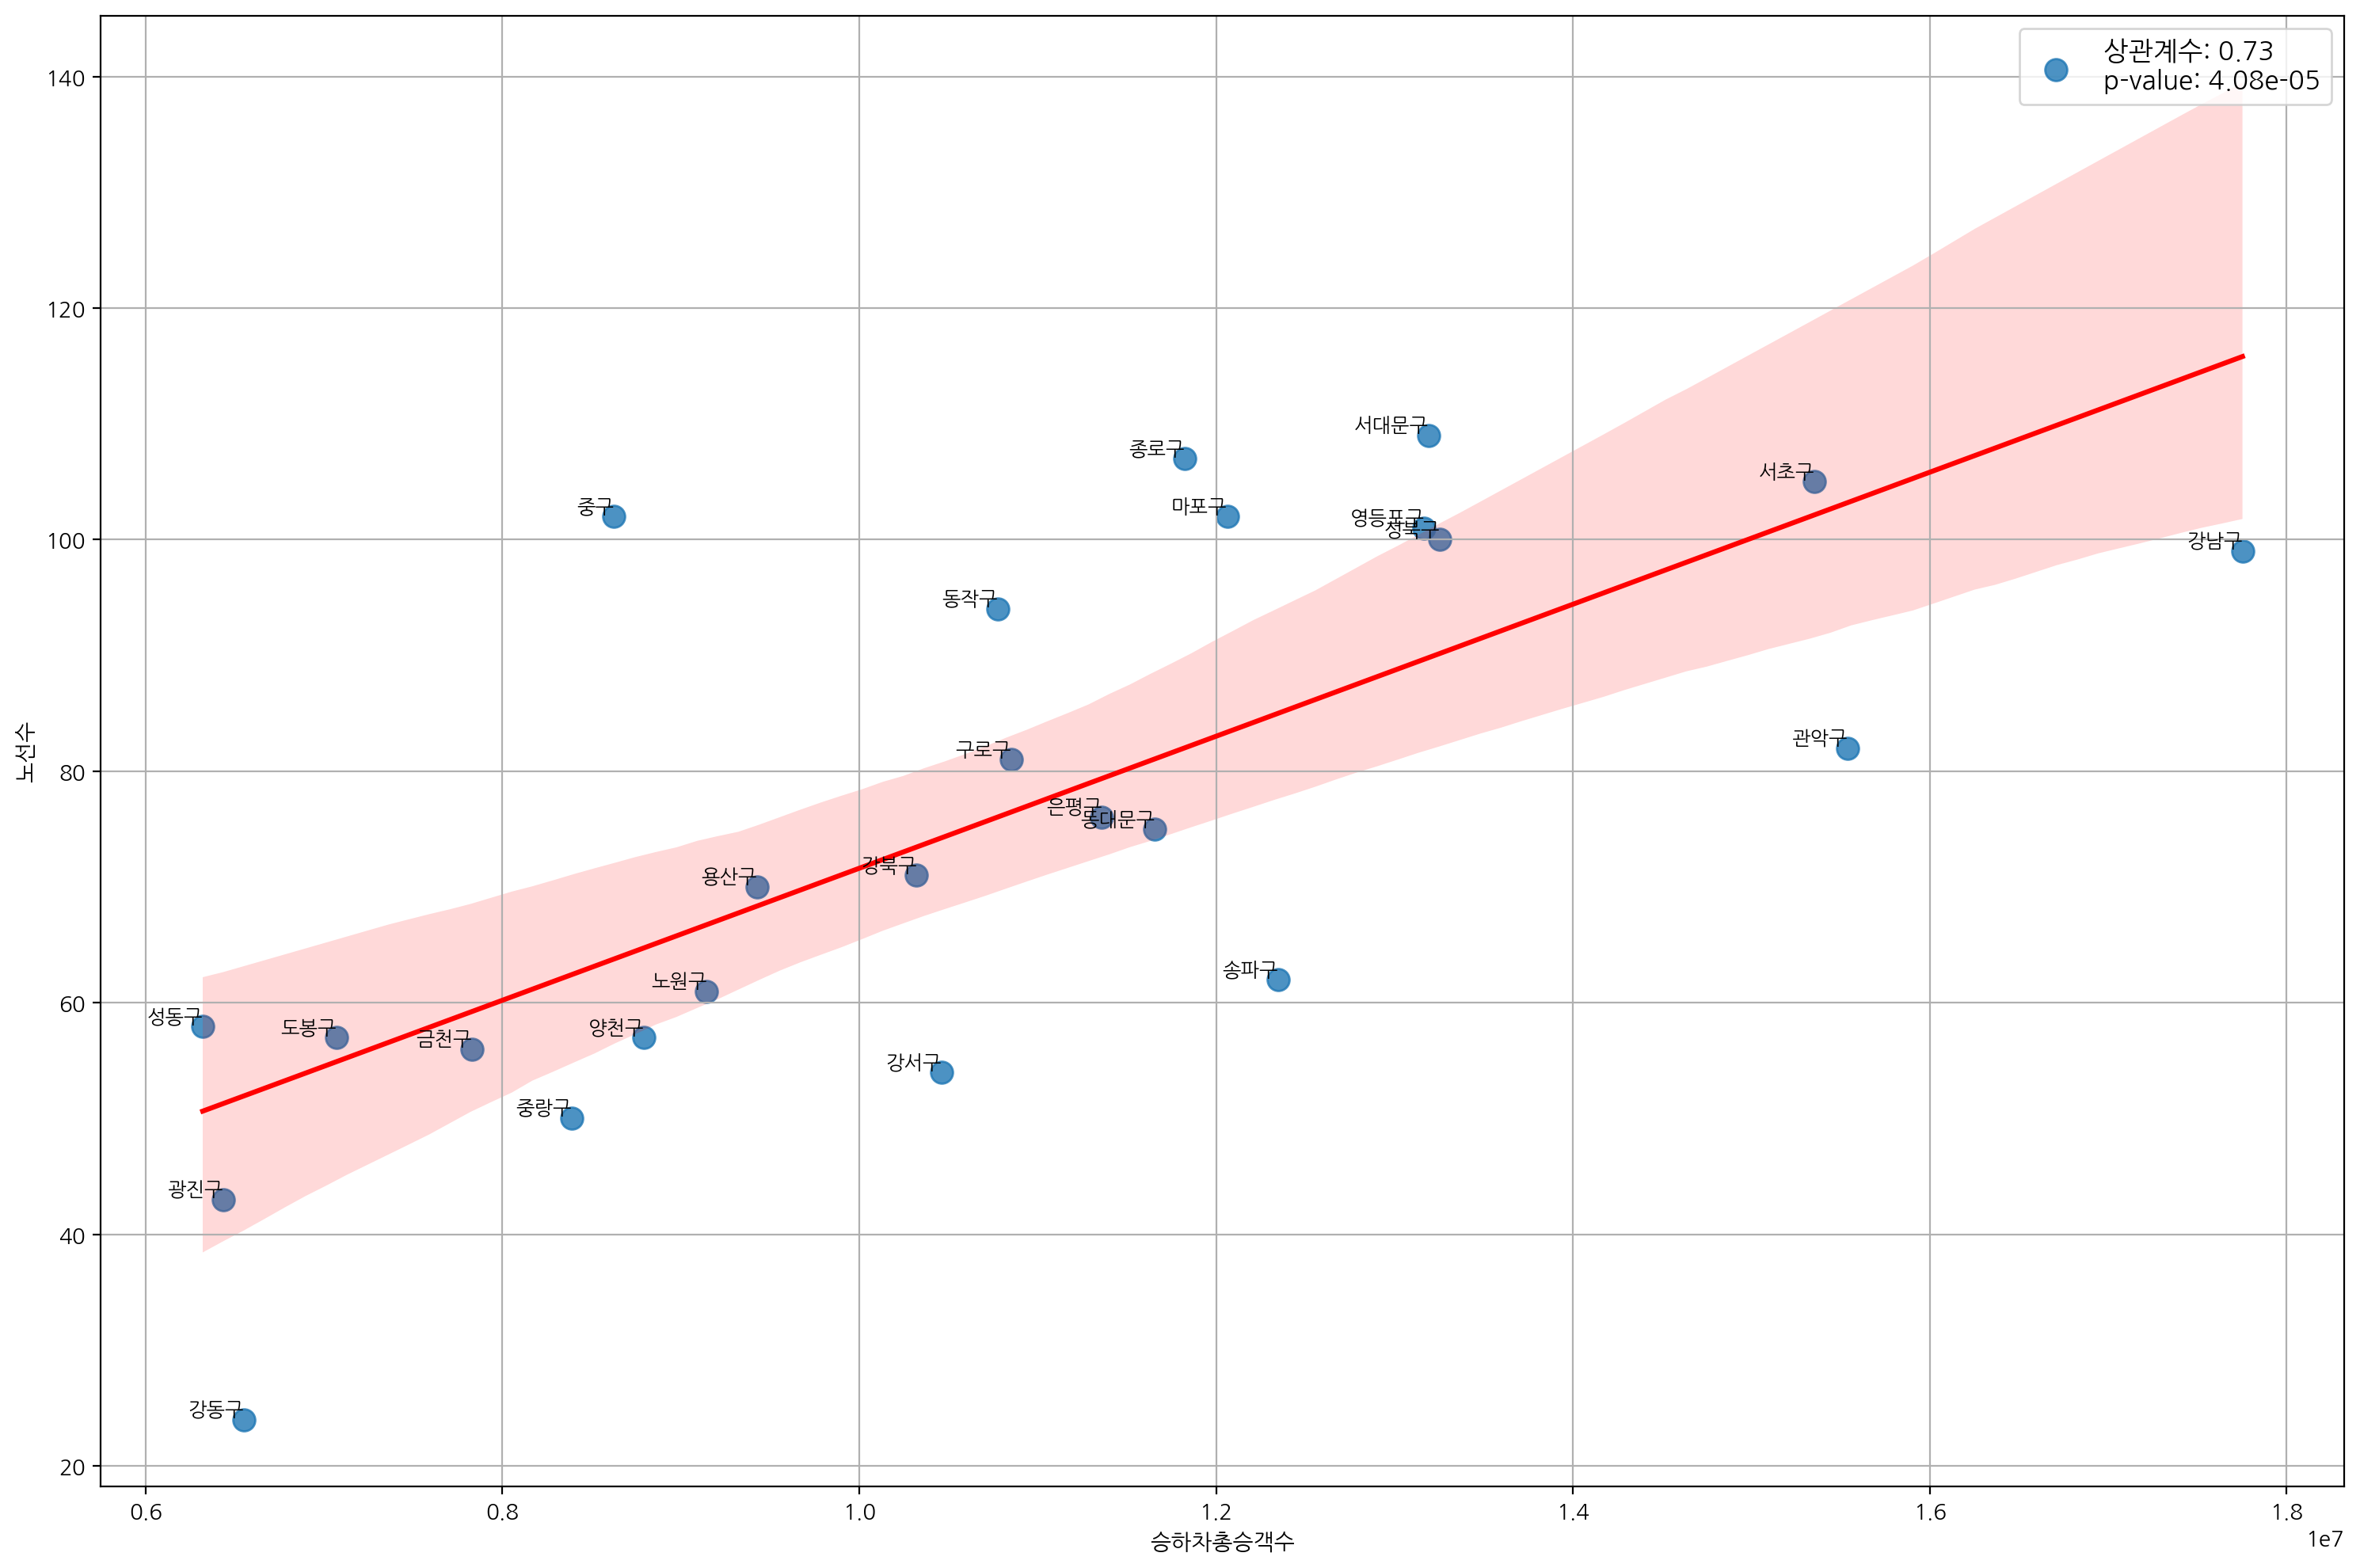

In [22]:
plt.figure(figsize=(15, 10))

# 산점도와 선형 회귀선

sns.regplot(x='승하차총승객수', y='노선수', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.xlabel('승하차총승객수')
plt.ylabel('노선수')
plt.grid()

# 상관계수 및 p-value 계산
correlation, p_value = spst.pearsonr(df['승하차총승객수'], df['노선수'])

# 상관계수와 p-value를 레전드로 추가
label_text = f'상관계수: {correlation:.2f}\np-value: {p_value:.2e}'
plt.legend([label_text], loc='upper right', fontsize=12)

for i in range(len(df)):
    plt.text(df['승하차총승객수'].iloc[i], df['노선수'].iloc[i],
             df['자치구'].iloc[i],
             fontsize=9, ha='right', va='bottom')

result = spst.pearsonr(df['승하차총승객수'],df['노선수'])
print('승하차총승객수'+'-'+'노선수')
print(f'상관계수 : {result[0]}')
print(f'p-value : {result[1]}')

plt.tight_layout()
plt.show()

In [ ]:
# 주석



# 의견: 

### HeatMap으로 시각화

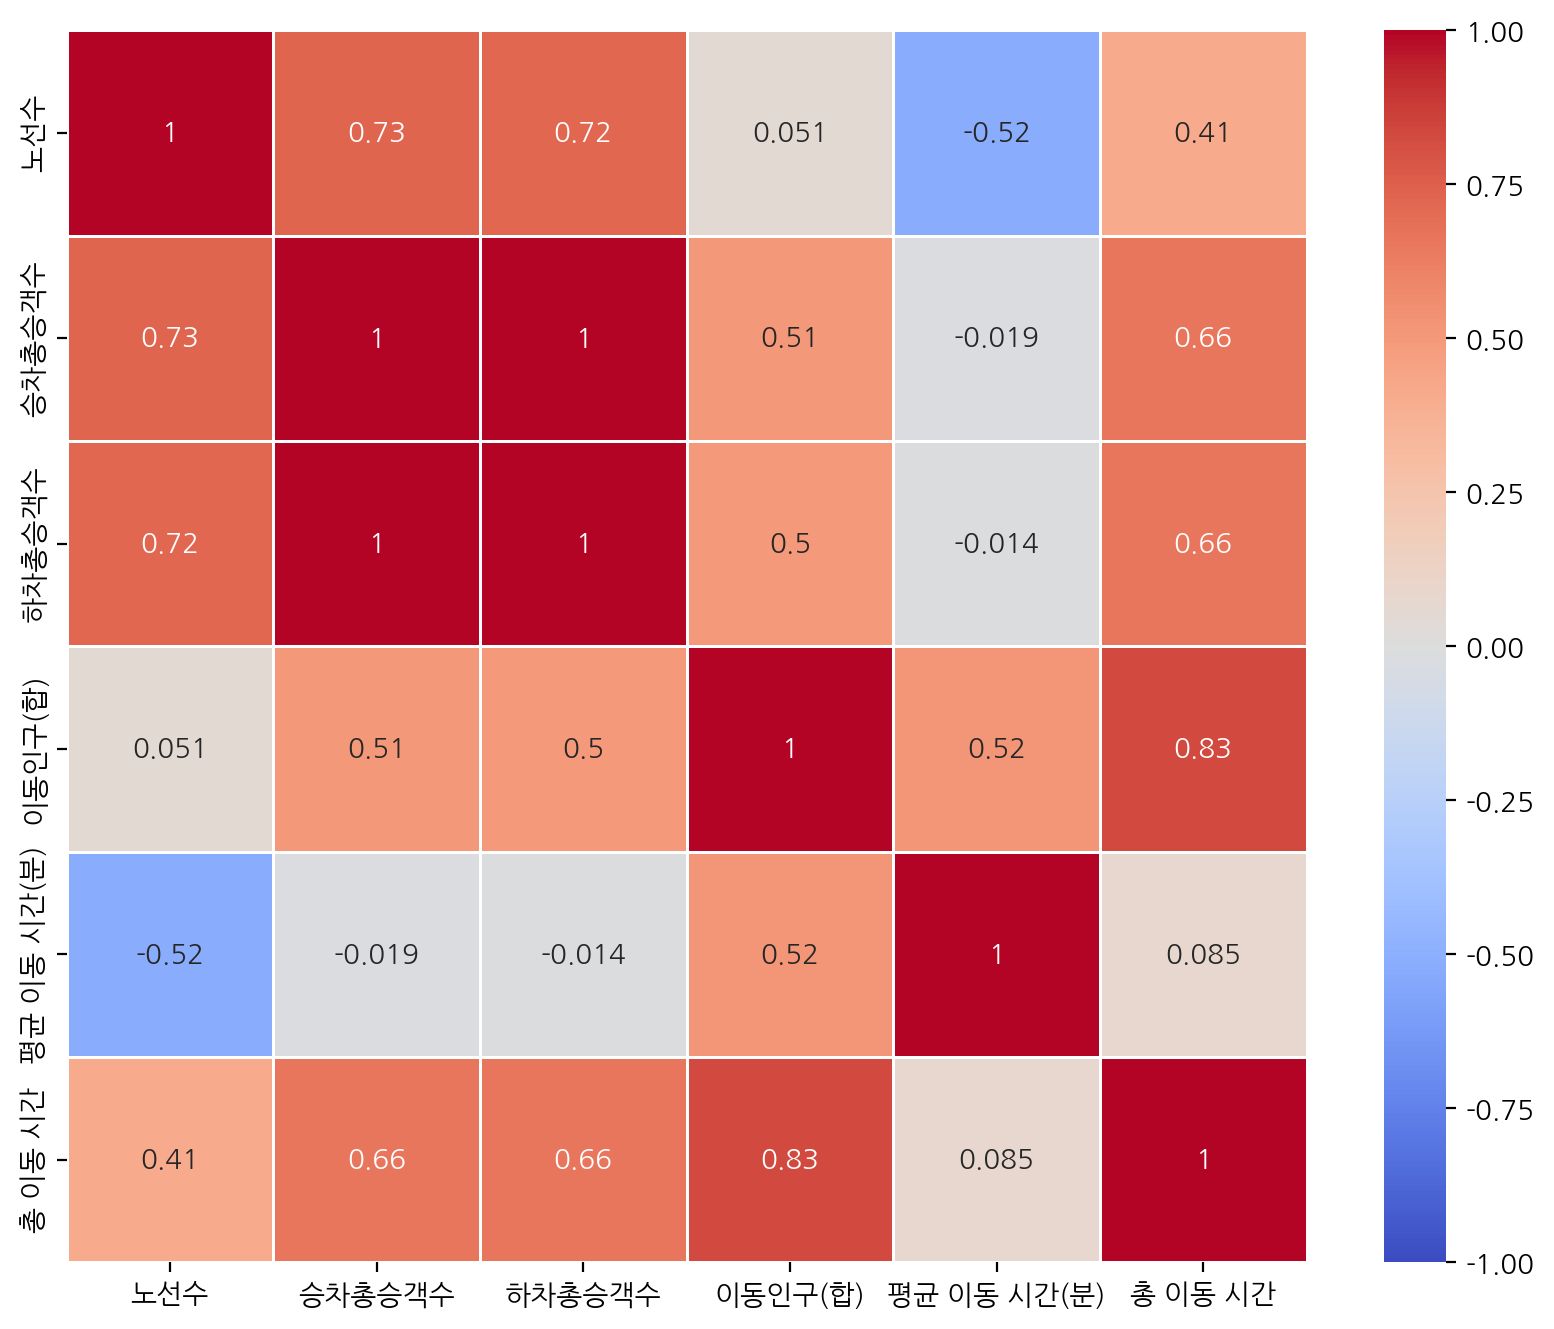

In [23]:
# 상관계수를 HeatMap으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 열 선택
subset_df = df[['노선수', '승차총승객수', '하차총승객수', '이동인구(합)', '평균 이동 시간(분)', '총 이동 시간']]

# 상관계수 계산
corr_matrix = subset_df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# 제목과 축 설정
plt.show()

### 위 차트를 통해 알게된 사실을 정리해봅시다.
- 승하차승객수와 노선수는 강한 관계인 것을 알 수 있다.
- 예상했던 것에 비해 이동인구(합)은 노선수와 강한 관계가 아니였다는 것을 알 수 있었다.
- 이동인구에 따라 총 이동 시간은 비례하는 관계이기 때문에 엄청 강한 관계인 것을 다시 확인 할 수 있었다.

# 6. 관계 정리

### 1) 강한 관계의 열

노선수, 승차총승객수(0.73)</br>
노선수, 하차총승객수(0.72)</br>
이동인구(합), 총이동시간(0.83)

### 2) 중간 관계의 열

노선수, 평균이동시간(분)(-0.52)</br>
승차총승객수, 이동인구(합)(0.51)</br>
승차총승객수, 총이동시간(0.66)</br>
하차총승객수, 총이동시간(0.66)</br>
하차총승객수, 이동인구(합)(0.5)

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 인구수

### 금천구, 성동구, 도봉구, 광진구, 중랑구, 양천구, 강동구
'인구수가 많을 수록, 이동하는 교통량이 많아질 수 있어서 인구수와 노선수는 비례할 것이다.'라는 생각으로 가설을 설정하였다.</br>
하지만 상관계수, p-value와 산점도를 모두 고려했을때, 인구수와 노선수는 아무런 관계가 없다는 걸 확인할 수 있었다.</br>
따라서 가설1을 기각하였다.

### 2) 업종

### 강동구, 강서구, 송파구, 중랑구, 광진구
'업종 대비 노선수의 차이가 존재할까?'라는 생각으로 다양한 업종(한식 일반 음식점업, 커피전문점, 운송업 등) 중에서 특정 업종이 많을수록 노선수도 증가하는 양의 상관관계를 가질 것이라고 가설을 세웠다. 이를 위해 저희는 경험적 근거와 사고실험을 통해 여러 업종 중에서 다음의 세 가지 업종이 노선수와 유의미한 관계가 있을 것이라는 확정했다:1. 한식 일반 음식점업2. 커피전문점3. 일반 교과 학원1. **한식 일반 음식점업과 노선수:**   - 상관계수: 0.47   - p-value: 0.0187   - 95% 신뢰 구간 내에서 유의미한 양의 상관관계를 보였다.2. **커피전문점과 노선수:**   - 상관계수: 0.48   - p-value: 0.015   - 한식 일반 음식점업과 유사하게 중간 정도의 양의 상관관계를 나타내며, 95% 신뢰 구간 내에서 유의미한 관계가 있음을 확인할 수 있었다.3. **기타주점업과 일반 교과 학원:**   - 상관계수: 0.3 이하   - p-value: 0.15 이상   - 노선수와의 상관관계가 매우 낮아 유의미한 관계를 찾기 어려웠다. 신뢰 구간도 넓게 형성되어 있어 통계적으로 유의미하지 않음을 알 수 있었다.

### 3) 평균이동시간

### 용산구, 성동구, 양천구, 광진구, 중랑구, 

'해당 자치구에 평균이동시간이 높으면 노선수가 부족해서 생기는 일이 있을 수도 있다.' 라는 생각으로 가설을 설정하였다.</br>
선점도를 분석하였을때 뚜렷하진 않지만 평균이동시간이 낮을수록 노선수가 높은 모습을 확인할 수 있었다.</br>
상관계수와 p-value를 확인하였을때 중간 상관계수(-0.52)를 보였다.

### 4) 승하차승객수

### 강동구,중량구,강서구,송파구,관악구,강남구
'승/하차 인구가 많은 지역에는 노선수가 많을 것이다.'라는 생각으로 가설을 설정하였다.</br>
산점도 분석을 통해 승/하차총승객수가 높을수록 노선수가 높은 모습을 확인할 수 있었다.</br>
상관계수와 p-vlaue를 확인하였을 때 높은 상관계수(0.72)를 보였다

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

1순위 강동구, 중랑구</br>
2순위 광진구</br>
3순위 송파구, 강서구, 양천구, 성동구</br>
4순위 관악구, 용산구, 금천구, 도봉구, 강남구</br>

### 결론2: 그 이유는 무엇인가요?

앞서 선정한 가설중 상관계수가 0.5 이상인 관계를 가지는 데이터를 기준으로 선점도를 분석하고, 각 가설의 선점도를 분석하여 신뢰구간보다 낮은 노선수를 가진 자치구를 뽑아 목록화 하였다.</br>
- 1순위 강동구, 중랑구</br>
- 2순위 광진구</br>
- 3순위 송파구, 강서구, 양천구, 성동구</br>
- 4순위 관악구, 용산구, 금천구, 도봉구, 강남구</br></br>
위 순위와 같이 선정한 가설에서 공통적으로 노선수가 적다고 판단되는 자치구를 우선적으로 노선을 만들어야 한다고 판단된다.